1.0


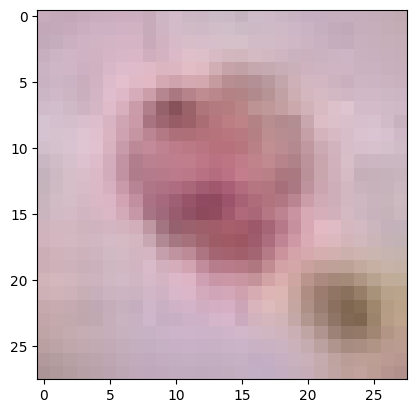

1.0


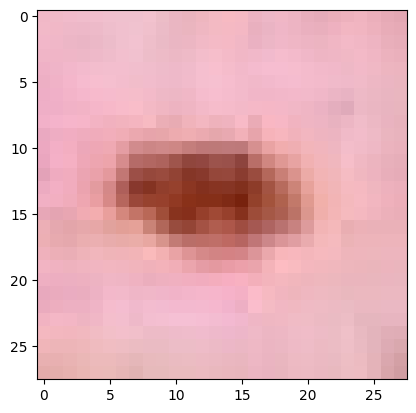

0.0


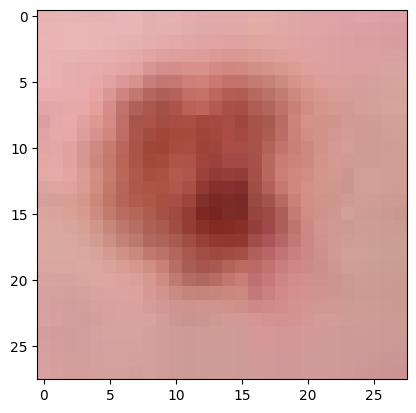

1.0


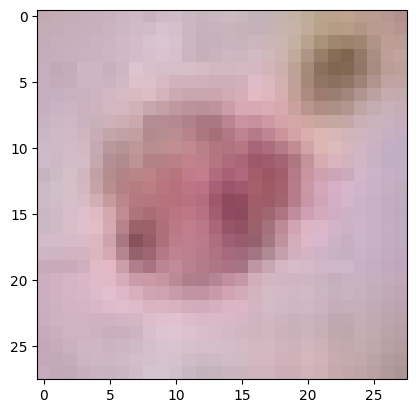

1.0


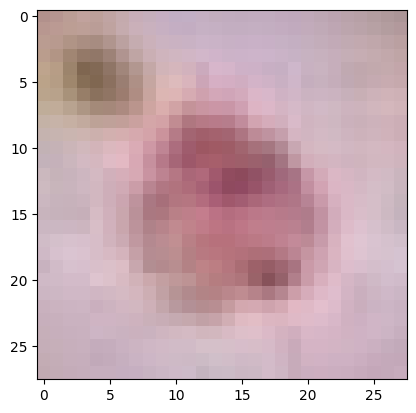

1.0


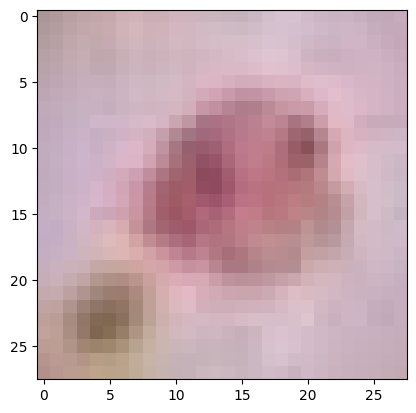

1.0


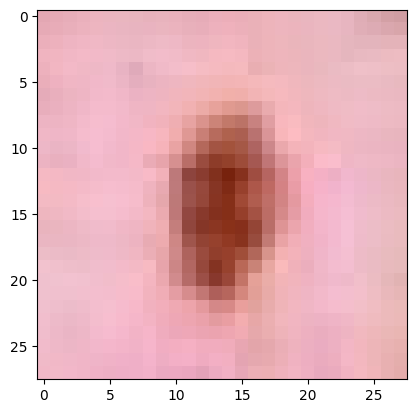

1.0


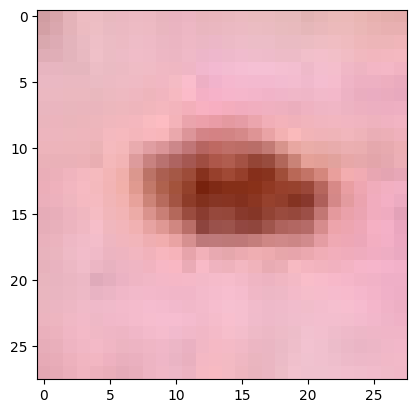

1.0


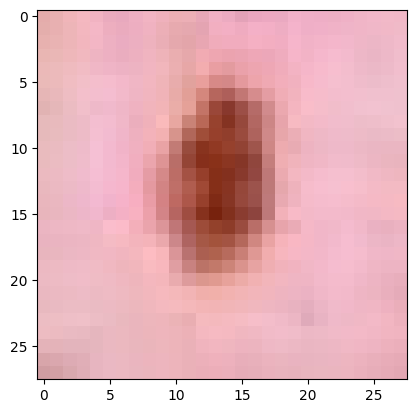

0.0


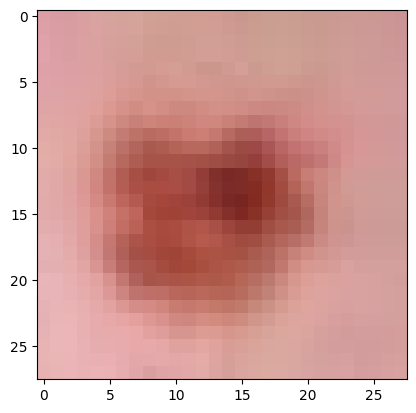

0.0


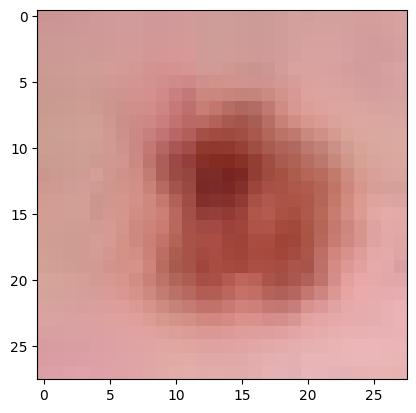

0.0


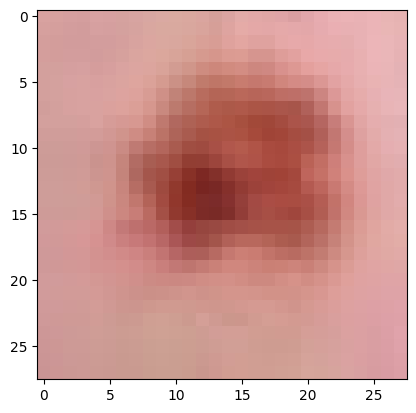

In [1]:
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.ndimage import rotate

angle = [90, 180, 270]
xtrain = np.load("Dados/Xtrain_Classification1.npy")[0:3]
y_train = np.load("Dados/ytrain_Classification1.npy")[0:3]
xtrain = xtrain.reshape(-1,28,28,3)[0:3]
for idx,i in enumerate(xtrain):
    for ang in angle:
        xtrain = np.vstack((xtrain, rotate(i, ang, reshape=False).reshape(-1,28,28,3)))
        y_train = np.append(y_train,y_train[idx])

for idx, i in enumerate(xtrain):
    plt.imshow(i)
    print(y_train[idx])
    plt.show()

In [2]:
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
import cv2
X_train = np.load("Dados/Xtrain_Classification1.npy")[0:3] 
y_train = np.load("Dados/ytrain_Classification1.npy")[0:3]

addx = np.array([])
addy = np.array([]) 
X_trainrs = X_train.reshape(-1, 28,28,3)
for idx, i in enumerate(y_train):
    if i == 1:
        for l in range(4):
            if l == 0:
                if not np.any(addx):
                    addx = np.expand_dims(cv2.rotate(X_trainrs[idx], cv2.ROTATE_90_COUNTERCLOCKWISE), axis=0)
                    addy = np.append(addy,i)
                else:
                    aux = np.expand_dims(cv2.rotate(X_trainrs[idx], cv2.ROTATE_90_COUNTERCLOCKWISE), axis=0)
                    addx = np.append(addx,aux,axis=0)
                    addy = np.append(addy,i)
                   
            elif l == 1:
                aux = np.expand_dims(cv2.rotate(X_trainrs[idx], cv2.ROTATE_90_CLOCKWISE), axis=0) 
                addx = np.append(addx,aux,axis=0)
                addy = np.append(addy,i)
            
            elif l == 2:
                aux = np.expand_dims(cv2.rotate(X_trainrs[idx],  cv2.ROTATE_180), axis=0) 
                addx = np.append(addx,aux,axis=0)
                addy = np.append(addy,i)

X_trainrs = np.append(X_trainrs,addx,axis=0) 
y_train = np.append(y_train,addy)

1.0


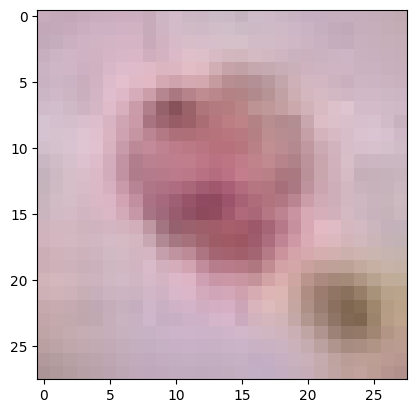

1.0


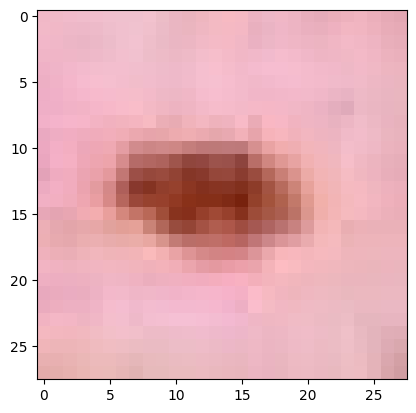

0.0


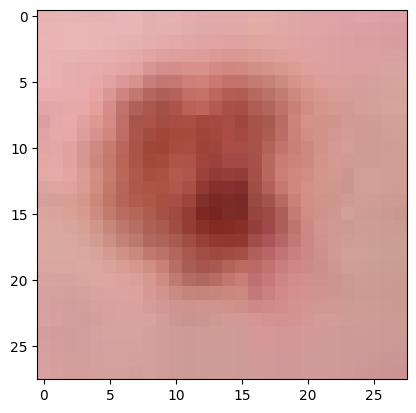

1.0


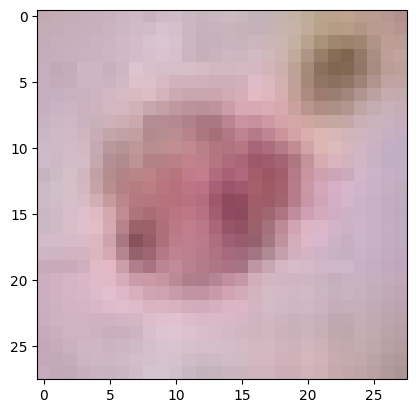

1.0


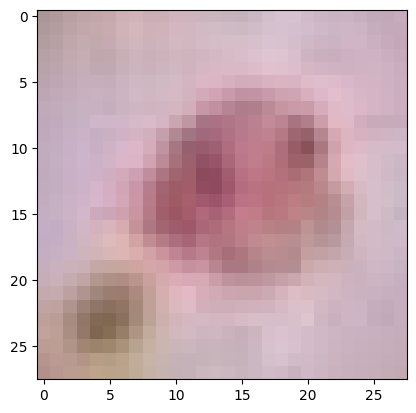

1.0


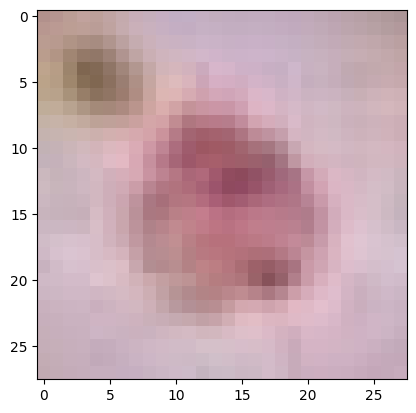

1.0


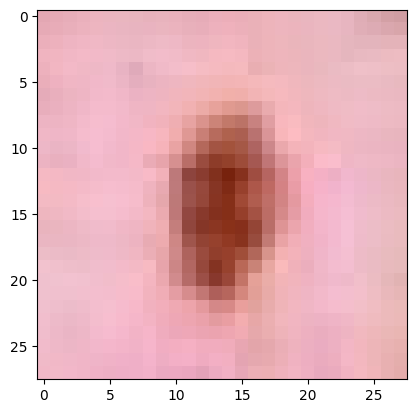

1.0


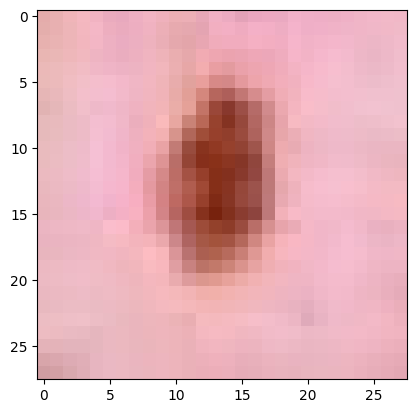

1.0


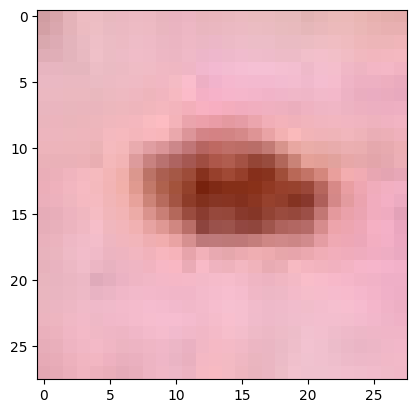

In [3]:
for idx,i in enumerate(X_trainrs):
   plt.imshow(i)
   print(y_train[idx])
   plt.show()